In [1]:
import sympy
from sympy import *
import numpy as np
from numpy import random
import math
import scipy
init_printing(use_unicode=True)
from matplotlib import pyplot as plt
%matplotlib inline
from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum import TensorProduct as tp
from mpmath import factorial as fact
import io
import base64
#from IPython.core.display import display, HTML, clear_output
from IPython import *
from ipywidgets import interactive, interact, fixed, interact_manual, widgets
import csv
import importlib
import scipy.interpolate
from mpl_toolkits.mplot3d import Axes3D, proj3d
from itertools import product, combinations
from matplotlib.patches import FancyArrowPatch
from matplotlib import cm, colors
from sympy.functions.special.tensor_functions import KroneckerDelta
from scipy.linalg import polar, lapack
import mpmath

In [2]:
# constantes físicas
e = 1.60217662*10**-19 # C (carga elementar)
k = 8.9875517923*10**9 # Nm^2/C^2 (constante de Coulomb)
eps0 = 8.8541878128*10**-12 #F/m (permissividade do vácuo)
mu0 = 1.25663706212*10**-6 # N/A^2 (permeabilidade do vácuo) 
h = 6.626069*10**-34 # Js (constante de Planck)
heV = h/e # em eV
hb = h/(2*math.pi) # hbar
hbeV = hb/e # em eV
c = 2.99792458*10**8 # m/s (velocidade da luz no vácuo)
G = 6.6742*10**-11 # Nm^2/kg^2 (constante gravitacional)
kB = 1.38065*10**-23 # J/K (constante de Boltzmann)
me = 9.109382*10**-31 # kg (massa do elétron)
mp = 1.6726219*10**-27 # kg (massa do próton)
mn = 1.67492749804*10**-27 # kg (massa do nêutron)
mT = 5.9722*10**24 # kg (massa da Terra)
mS = 1.98847*10**30 # kg (massa do Sol)
u = 1.660538921*10**-27 # kg (unidade de massa atômica)
dTS = 1.496*10**11 # m (distância Terra-Sol)
rT = 6.3781*10**6 # m (raio da Terra)
sSB = 5.670374419*10**-8 # W⋅m−2⋅K−4 (constante de Stefan-Boltzmann)
Ri = 10973734.848575922 # m^-1 (constante de Rydberg)
al = (k*e**2)/(hb*c) # ~1/137.035999084 (constante de estrutura fina)
a0=(hb**2)/(me*k*e**2) # ~ 0.52917710^-10 m (raio de Bohr)
ge = 2 # (fator giromagnetico do eletron)
gp = 5.58 # (fator giromagnetico do proton)

In [7]:
def id(n): 
    '''retorna a matriz identidade nxn'''
    id = zeros(n,n)
    for j in range(0,n):
       id[j,j] = 1
    return id
#id(2)

In [3]:
def pauli(j):
    '''retorna as matrizes de Pauli'''
    if j == 1:
        return Matrix([[0,1],[1,0]])
    elif j == 2:
        return Matrix([[0,-1j],[1j,0]])
    elif j == 3:
        return Matrix([[1,0],[0,-1]])
#pauli(1), pauli(2), pauli(3)

In [11]:
def tr(A):
    '''retorna o traço de uma matriz'''
    d = A.shape[0]
    tr = 0
    for j in range(0,d):
        tr += A[j,j]
    return tr
#tr(pauli(1))

In [13]:
def comm(A,B):
    '''retorna a função comutador'''
    return A*B-B*A
#comm(pauli(1),pauli(2))

In [15]:
def acomm(A,B):
    '''retorna a função anti-comutador'''
    return A*B+B*A
#acomm(pauli(1),pauli(2))

In [17]:
def cb(n,j):
    '''retorna um vetor da base padrão de C^n'''
    vec = zeros(n,1)
    vec[j] = 1
    return vec
#cb(2,0)

In [19]:
def proj(psi): 
    '''retorna o projeto no vetor psi'''
    d = psi.shape[0]
    P = zeros(d,d)
    for j in range(0,d):
        for k in range(0,d):
            P[j,k] = psi[j]*conjugate(psi[k])
    return P
#proj(cb(2,0))

In [21]:
def bell(j,k):
    if j == 0 and k == 0:
        return (1/sqrt(2))*(tp(cb(2,0),cb(2,0))+tp(cb(2,1),cb(2,1)))
    elif j == 0 and k == 1:
        return (1/sqrt(2))*(tp(cb(2,0),cb(2,1))+tp(cb(2,1),cb(2,0)))
    elif j == 1 and k == 0:
        return (1/sqrt(2))*(tp(cb(2,0),cb(2,1))-tp(cb(2,1),cb(2,0)))
    elif j == 1 and k == 1:
        return (1/sqrt(2))*(tp(cb(2,0),cb(2,0))-tp(cb(2,1),cb(2,1)))
#bell(0,0), bell(0,1), bell(1,0), bell(1,1)

In [23]:
def inner_product(v,w):
    d = len(v); ip = 0
    for j in range(0,d):
        ip += conjugate(v[j])*w[j]
    return ip
#a,b,c,d = symbols("a b c d"); v = [b,a]; w = [c,d]; inner_product(v,w)

In [25]:
def norm(v):
    d = len(v)
    return sqrt(inner_product(v,v))
#v = [2,2]; norm(v)

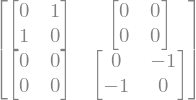

In [8]:
def tp(x,y):
    return tensorproduct(x,y)
A = tp(pauli(3),pauli(1)); A